In [151]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
from scipy import fftpack
from scipy.integrate import quad, quadrature

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

Fraction of nuclei already decayed is given by:


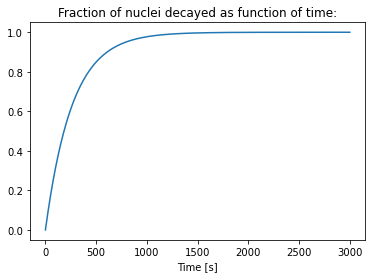

After every second every nucleus has a probability p(1) to decay hence at every step we should remove p(1)*N(i-1) to the population of the previous instant of time N[i-1]
The behaviours of the two populations is given by:


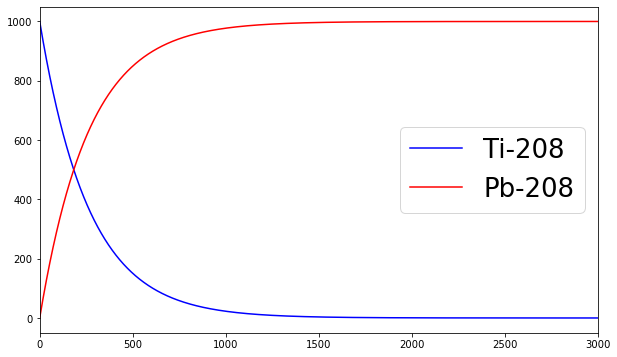

Alternative: at each step we generate one random number Z between 0-1 for each nucleus not decayed . If Z <p(1) the nucleus doesn't decay otherwise it deacys and we remove it from the population of Ti
The behaviours of the two populations is given by:


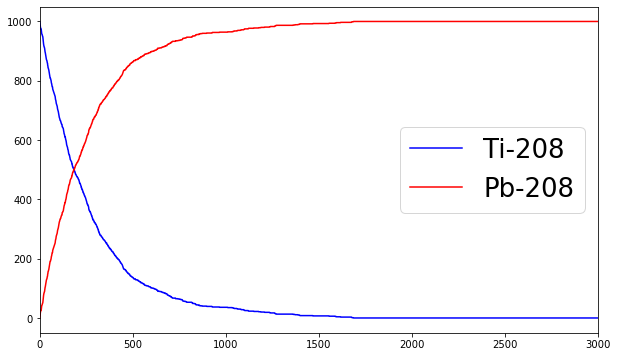

In [152]:
N0=1000
tau=3.052*60

def p(t):
 return 1-2**(-t/tau)

print("Fraction of nuclei already decayed is given by:")
t=np.arange(3000)
y=p(t)
plt.plot(t,y)
plt.title("Fraction of nuclei decayed as function of time:")
plt.xlabel("Time [s]")
plt.show()

print("After every second every nucleus has a probability p(1) to decay hence at every step we should remove p(1)*N(i-1) to the population of the previous instant of time N[i-1]")

#initial population of  Ti
N=np.array([N0])

#population of Pb
F=np.array([0])

#for cycle removing decayed nuclei and adding to the Pb population
for i in range(1,3000):
    N=np.append(N,N[i-1]-p(1)*N[i-1])
    F=np.append(F,F[i-1]+p(1)*N[i-1])
    
    
#graphic
print("The behaviours of the two populations is given by:")
fig, ax = plt.subplots(figsize=(10, 6)) # create the figure and the axes
ax.plot(t, N , c='blue', label="Ti-208")
ax.plot(t, F, c='red', label="Pb-208")
ax.legend(loc='center right', prop={'size': 26})
ax.set_xlim([0, 3000])
plt.show()



print("Alternative: at each step we generate one random number Z between 0-1 for each nucleus not decayed . If Z <p(1) the nucleus doesn't decay otherwise it deacys and we remove it from the population of Ti")
#initial population of  Ti
N=np.array([N0])

#population of Pb
F=np.array([0])

#for cycle removing decayed nuclei and adding to the Pb population
for i in range(1,3000):
    N=np.append(N,N[i-1])
    F=np.append(F,F[i-1])
    Z = np.random.random(N[i-1])
    for j in range(len(Z)):
        if Z[j]<p(1):
            N[i]=N[i]-1
            F[i]=F[i]+1

print("The behaviours of the two populations is given by:")
fig, ax = plt.subplots(figsize=(10, 6)) # create the figure and the axes
ax.plot(t, N , c='blue', label="Ti-208")
ax.plot(t, F, c='red', label="Pb-208")
ax.legend(loc='center right', prop={'size': 26})
ax.set_xlim([0, 3000])
plt.show() 

* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

The cumulative distribution of the probability of decay is given by:


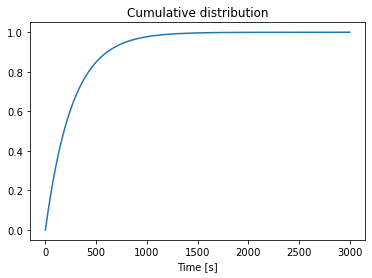

Generating 1000 numbers between [0-1] and using the inverse method to get time of decay


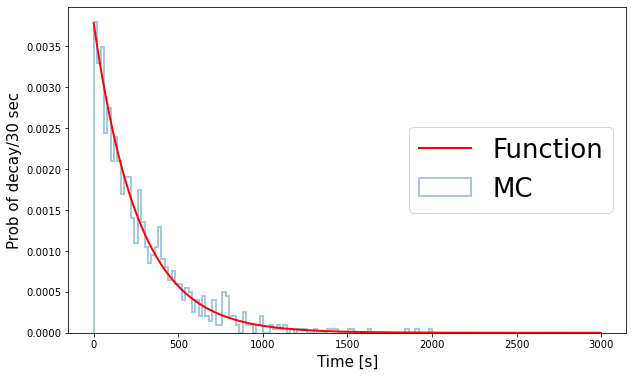

Check that the pdf is correctly normalized

The integral of the pdf is	 1.0 +- 6.404908233397037e-12
The number of decays occuring is the following:


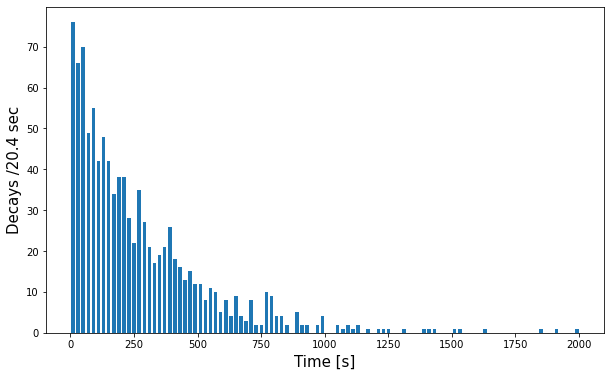

The plot of nuclei that have not deacyed yet is given by:


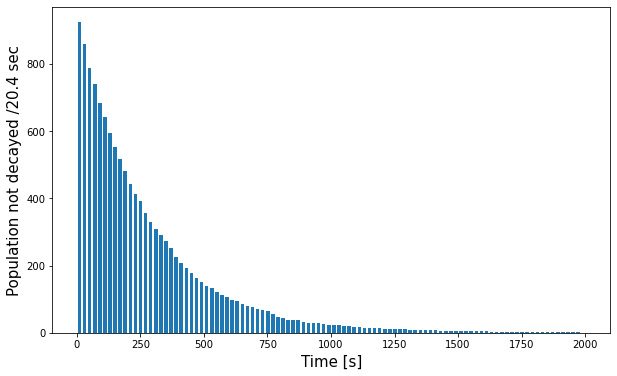

In [153]:
def f(t):
    return (2**(-t/tau)*np.log(2)/tau)
def cdf(t):
    return 1-np.exp(-t*np.log(2)/tau)

print("The cumulative distribution of the probability of decay is given by:")
y2=cdf(t)
plt.plot(t,y2)
plt.title("Cumulative distribution")
plt.xlabel("Time [s]")
plt.show()

print("Generating 1000 numbers between [0-1] and using the inverse method to get time of decay")
def inverse(y):
    return (-np.log(1-y)*tau/(np.log(2)))
u = np.random.random(1000)
v = inverse(u) 





fig, ax = plt.subplots(figsize=(10, 6)) # create the figure and the axes
ax.hist(v, histtype='step', bins=100, density=True, linewidth=2,alpha=0.4, label="MC")  # plot histogram of the sample v
ax.plot(t, f(t) , c='red', label="Function",linewidth=2)
ax.set_xlabel("Time [s]",fontsize=15)
ax.set_ylabel("Prob of decay/30 sec",fontsize=15)
ax.legend(loc='center right', prop={'size': 26})
plt.show()

print("Check that the pdf is correctly normalized\n")
result = quad(lambda x:f(x), 0, np.inf)


print("The integral of the pdf is\t",result[0],"+-",result[1])
print("The number of decays occuring is the following:")
fig1 = plt.figure(figsize=(10,6))
hist, bins = np.histogram(v, bins = 100)
plt.ylabel('Decays /{0:.1f} sec'.format(bins[1]),fontsize=15)
plt.xlabel('Time [s]',fontsize=15)
center = (bins[:-1]+bins[1:])/2
width = 0.7*(bins[1]-bins[0])
plt.bar(center, hist, align = 'center', width = width)
plt.show()

print("The plot of nuclei that have not deacyed yet is given by:")
fig2 = plt.figure(figsize=(10,6))
hist = [ 1000-float(n) for n in np.cumsum(hist)]
plt.ylabel('Population not decayed /{0:.1f} sec'.format(bins[1]),fontsize=15)
plt.xlabel('Time [s]',fontsize=15)
center = (bins[:-1]+bins[1:])/2
width = 0.7*(bins[1]-bins[0])
plt.bar(center, hist, align = 'center', width = width)
plt.show()


2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

The exercise require to compute the integral between [0-2].

We can split the integral between [0-1] and [1-2] and compute one of the two integrals and then double it since the function is symmetric with respect to x=1.


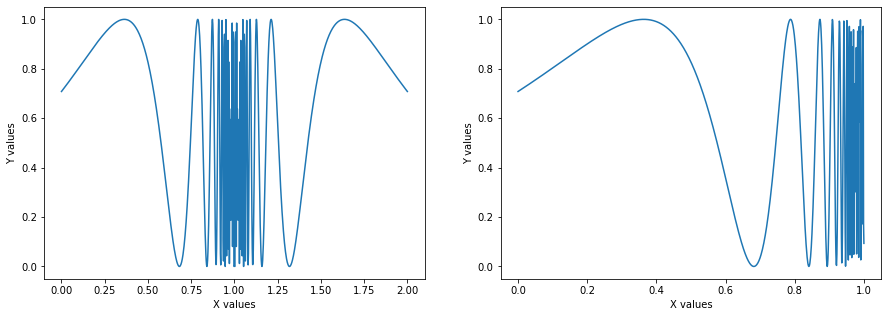

In [154]:
print('''The exercise require to compute the integral between [0-2].\n
We can split the integral between [0-1] and [1-2] and compute one of the two integrals and then double it since the function is symmetric with respect to x=1.''')



def g(x):
    return np.sin(1/(1-x))*np.sin(1/(1-x))

xa=np.linspace(0,2,1000)
xb=np.linspace(0,0.9999,1000)


fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(xa, g(xa))
axs[0].set_xlabel('X values')
axs[0].set_ylabel('Y values')

axs[1].plot(xb, g(xb))
axs[1].set_xlabel('X values')
axs[1].set_ylabel('Y values')

plt.show()


I am computing 1000 times the integral. Each of this time I am generating 10000 numbers to compute the integral

The integral of the function between [0-2] with the hit/reject method is 1.3471 +- 0.0003
Distribution of the results:


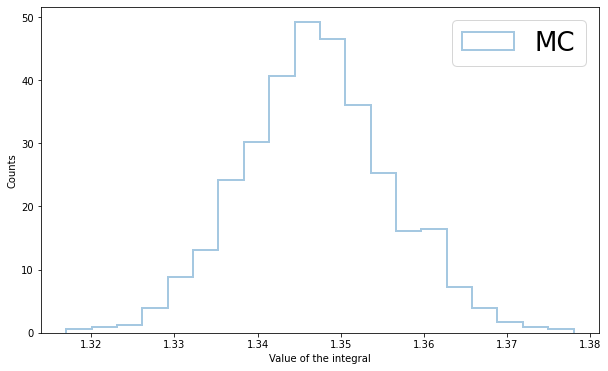

In [155]:
res=np.array([])
N = 10000 # number of generated to compute the integral
iterations=1000

print("I am computing {0} times the integral. Each of this time I am generating {1} numbers to compute the integral".format(iterations,N) )
for j in range(iterations):
    count = 0
    for i in range(N):
        x = np.random.random()
        y = np.random.random()

        if y < g(x): count += 1
    I=2*count/N
    res=np.append(res,I)
print("\nThe integral of the function between [0-2] with the hit/reject method is {0:.4f} +- {1:.4f}".format(np.mean(res), np.std(res)/np.sqrt(iterations)))
print("Distribution of the results:")
fig, ax = plt.subplots(figsize=(10, 6)) # create the figure and the axes
ax.hist(res, histtype='step', bins=20, density=True, linewidth=2,alpha=0.4, label="MC")  # plot histogram of the sample v
ax.set_xlabel("Value of the integral")
ax.set_ylabel("Counts")
ax.legend(loc='best', prop={'size': 26})
plt.show()


* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

### Mean value Method

In [156]:
p=1000
print("Generating {0} random numbers between 0-1 since the mean value between [0-1] is the same between [0-2]\n".format(p))
x=np.linspace(0,0.99999,p)

values=g(x)
mean=np.mean(values)
print("The mean value of the function between [0-1] is {0:.3f}".format(mean))
print("The integral between [0-2] with the mean value method is {0:.3f} +- {1:.3f}".format(2*mean,2*np.std(values)/np.sqrt(p)))

print("Compatibility with previous result: {0:.1f}".format( np.abs(np.mean(res)-2*mean)/(np.std(res)**2/iterations+4*np.std(values)**2/p)))

Generating 1000 random numbers between 0-1 since the mean value between [0-1] is the same between [0-2]

The mean value of the function between [0-1] is 0.674
The integral between [0-2] with the mean value method is 1.348 +- 0.021
Compatibility with previous result: 1.5


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [157]:
N=10000
print("Generation of {0} random numbers between [0-1] in x and y then evaluation of hit/reject method".format(N))
def f(x,y):
    return x**2+y**2
count = 0

for i in range(N):
    x = np.random.random()
    y = np.random.random()

    if f(x,y) < 1: count += 1
    I=4*count/N
print("Integral:\t",I)
print("Expected:\t", np.pi)

Generation of 10000 random numbers between [0-1] in x and y then evaluation of hit/reject method
Integral:	 3.1368
Expected:	 3.141592653589793


In [158]:
print("Generalization to a 3D sphere to check consistency of next results:")
#3D sphere
def f(a,b,c,):
    return a**2+b**2+c**2
count = 0
N=1000000
for i in range(N):
    a = np.random.random()
    b = np.random.random()
    c = np.random.random()

    if f(a,b,c) < 1: count += 1
    I=8*count/N
print("Integral: ",I)
print("Expected: ",4/3*np.pi)

Generalization to a 3D sphere to check consistency of next results:
Integral:  4.180456
Expected:  4.1887902047863905


In [159]:
#10D shpere
def ften(a,b,c,d,f,g,h,j,k,l):
    return a**2+b**2+c**2+d**2+f**2+g**2+h**2+j**2+k**2+l**2

count = 0
N=9000000
for i in range(N):
    a = np.random.random()
    b = np.random.random()
    c = np.random.random()
    d = np.random.random()
    f = np.random.random()
    g = np.random.random()
    h = np.random.random()
    j = np.random.random()
    k = np.random.random()
    l = np.random.random()


    if ften(a,b,c,d,f,g,h,j,k,l) < 1: count += 1
    I=2**10*count/N
print("Integral: ",I)
print("The analytical result is given by: ", np.pi**5/120)

Integral:  2.532352
The analytical result is given by:  2.550164039877345


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.


$$
I = \left\langle \frac{f(x)}{w(x)}\right\rangle \int_a^b w(x)dx \simeq \frac{1}{N}\sum_{i=1}^N \frac{f(x_i)}{w(x_i)}\int_a^b w(x)dx
$$

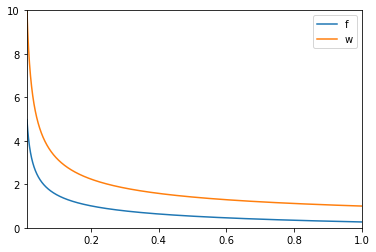

In [160]:
N=1000000
def w(x):
    return 1/np.sqrt(x)
def f(x):
    return 1/(np.sqrt(x)*(np.exp(x)+1))

x=np.linspace(0.0000001,1,N)



plt.plot(x,f(x),label='f')
plt.plot(x,w(x),label='w')
plt.xlim(0.01,1)
plt.ylim(0,10)
plt.legend()
plt.show()

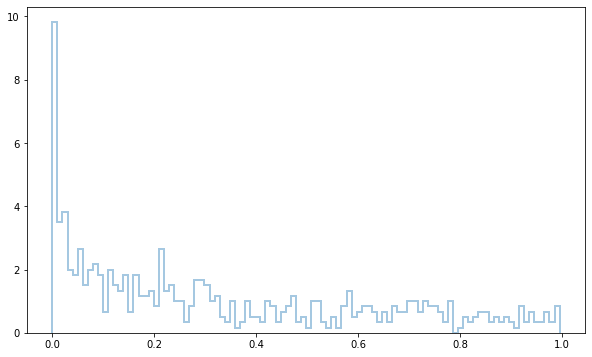

The value of the integral is  0.8413042190869577


In [161]:

z=np.array([])
N=1000000
for i in range(N):
    x = np.random.random()
    y = np.random.random()*w(0.0000001)

    if w(x) > y: 
        z=np.append(z,x)

        
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(z, histtype='step', bins=100, density=True, linewidth=2,alpha=0.4)  
plt.show()


wv=w(z)
fv=f(z)
ratio=fv/wv

#the integral of the 1/sqrt(x) between 0-1 is trivially calculated analytically:
weightintegral = 2

print("The value of the integral is ",np.mean(ratio)*weightintegral)
